# Usage Instructions

Just run the complete code once. Do not run each Cell separatly

Just run the code, sit back and relax.

Let the driver window run in maximised mode. Do not run it in windowed mode(It will maximise by itself)

Do not make any changes in the code except the SAMPLE_USERNAME and SAMPLE_PASSWORD. you can easily change them by refering the code below.

This code is written and tested with den wifi. if you are using a 3G connection, you might want to change the time gap between several Cells(at the end of some cells there is a line of code whose parameters you might want to alter.

Sometimes you will feel like the website is frozen. No! Its not. The code is still running doing its work. You will notice this specially when the list of followers is being scrolled down. it will take some time to read through all the follower's usernames.

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys 
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By 
from selenium.common.exceptions import StaleElementReferenceException
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from selenium.common.exceptions import NoSuchElementException    
import warnings
warnings.filterwarnings('ignore')

In [2]:
driver = webdriver.Chrome('chromedriver.exe')


## Logging in

In [3]:
driver.get('https://www.instagram.com/')
driver.maximize_window()
wait=WebDriverWait(driver,20)
wait.until(EC.presence_of_element_located((By.NAME,'username')))

user_name=driver.find_element_by_name('username')
user_name.send_keys('SAMPLE USERNAME')
password=driver.find_element_by_name('password')
password.send_keys('SAMPLE PASSWORD')
password.submit()

wait=WebDriverWait(driver,20)
wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="cmbtv"]/button')))

save_not_now_button=driver.find_element_by_xpath('//div[@class="cmbtv"]/button')
save_not_now_button.click()

wait=WebDriverWait(driver,20)
wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="mt3GC"]/button')))

no_notification_button=driver.find_element_by_xpath('//div[@class="mt3GC"]/button[2]')
no_notification_button.click()

## Food handles

In [4]:
search_box=driver.find_element_by_xpath('//body/div/section/nav/div/div/div/div[2]/input')
search_box.send_keys('food')

wait=WebDriverWait(driver,30)
wait.until(EC.presence_of_element_located((By.CLASS_NAME,'fuqBx')))

all_results=driver.find_element_by_class_name('fuqBx')
list_food_search_results=all_results.find_elements_by_tag_name('a')

users=[]
count=0

base_url='https://www.instagram.com/'
for i in list_food_search_results:
    link=i.get_attribute('href')
    name=link[len(base_url):]
    
    if "explore/locations" not in name and "explore/tags" not in name:
        handle_name=name.replace("/","")
        users.append(handle_name)
        count=count+1
        
    if count==10:
        break

cross_button=driver.find_element_by_class_name('coreSpriteSearchClear')
cross_button.click()

users


['foodtalkindia',
 'dilsefoodie',
 'foodie_gurugrammer',
 'yourfoodlab',
 'foodinsider',
 'food_lunatic',
 'food',
 'sick.foodies',
 'concentrate_on_food',
 'foodiee__gabbar']

## Finding number of followers of 1st 10 food handles

In [5]:
users_followers={}

for i in users:
    
    search_box=driver.find_element_by_xpath('//body/div/section/nav/div/div/div/div[2]/input')
    search_box.send_keys(i)
    
    wait=WebDriverWait(driver,20)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d')))

    user_handle=driver.find_element_by_class_name('yCE8d')
    user_handle.click()
    time.sleep(3)
    
    total_followers=driver.find_elements_by_class_name("g47SY")[1].get_attribute('innerHTML')
    
    users_followers[i]=total_followers
    
    driver.back()
    time.sleep(3)

    
users_followers

{'foodtalkindia': '299k',
 'dilsefoodie': '570k',
 'foodie_gurugrammer': '3,452',
 'yourfoodlab': '1.3m',
 'foodinsider': '2.1m',
 'food_lunatic': '89.2k',
 'food': '299k',
 'sick.foodies': '70',
 'concentrate_on_food': '927',
 'foodiee__gabbar': '11.6k'}

## Converting string to int

In [6]:
for i in users_followers:
    temp=users_followers[i]
    temp=temp.replace(",","")
    if 'k' in temp:
        temp=temp.replace("k","")
        temp=float(temp)*1000
    elif 'm' in temp:
        temp=temp.replace("m","")
        temp=float(temp)*1000000
        
    users_followers[i]=int(temp)
    
users_followers

{'foodtalkindia': 299000,
 'dilsefoodie': 570000,
 'foodie_gurugrammer': 3452,
 'yourfoodlab': 1300000,
 'foodinsider': 2100000,
 'food_lunatic': 89200,
 'food': 299000,
 'sick.foodies': 70,
 'concentrate_on_food': 927,
 'foodiee__gabbar': 11600}

## Finding top 5 food handles with most followers

In [7]:
top_5_food_users_folowers={}
count=0
for i in sorted(users_followers,key=users_followers.get,reverse=True):
    count=count+1
    top_5_food_users_folowers[i]=users_followers[i]
    if count==5:
        break
top_5_food_users_folowers

{'foodinsider': 2100000,
 'yourfoodlab': 1300000,
 'dilsefoodie': 570000,
 'foodtalkindia': 299000,
 'food': 299000}

## Finding number of posts done by top 5 handles in past 3 days by visiting each handle

In [10]:
top_5_food_user_posts={}

for i in top_5_food_users_folowers:
    
    search_box=driver.find_element_by_xpath('//body/div/section/nav/div/div/div/div[2]/input')
    search_box.send_keys(i)
    
    wait=WebDriverWait(driver,20)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d')))

    user_handle=driver.find_element_by_class_name('yCE8d')
    user_handle.click()
    time.sleep(3)
    
    count=0
    
    first_post=driver.find_element_by_xpath('//div[contains(@class,"_bz0w")]')
    first_post.click()
    time.sleep(3)
    
    while True:
        time.sleep(3)
        dates=driver.find_elements_by_tag_name('time')
        date=dates[len(dates)-1].get_attribute('innerHTML')
        next_post=driver.find_element_by_xpath('//a[contains(@class,"coreSpriteRightPaginationArrow")]')
       
        if 'ago' in date:
            if 'hour' or'minute' in date:
                count=count+1
                next_post.click()
            elif 'day' in date:
                t=date[0] 
                if t=='1' or t=='2' or t=='3':
                    count=count+1
                    next_post.click()
                else:
                    break
            else:
                break
        else:
            break
    
    
    top_5_food_user_posts[i]=count
    print(i,"has",count,"posts in past 3 days")
    
    driver.back()
    time.sleep(3)

top_5_food_user_posts

foodinsider has 11 posts in past 3 days
yourfoodlab has 9 posts in past 3 days
dilsefoodie has 8 posts in past 3 days
foodtalkindia has 9 posts in past 3 days
food has 9 posts in past 3 days


{'foodinsider': 11,
 'yourfoodlab': 9,
 'dilsefoodie': 8,
 'foodtalkindia': 9,
 'food': 9}

## Plotting bar graph to display above info

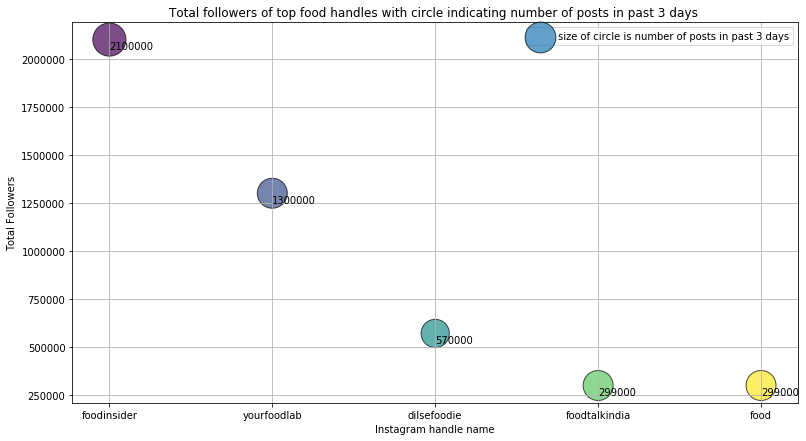

In [11]:
x=[]
y=[]
z=[]

for i in top_5_food_users_folowers:
    x.append(i)
    y.append(top_5_food_users_folowers[i])
    z.append(top_5_food_user_posts[i]*100) #  magnified by 100 to see clearly circles
    
color=np.arange(0,len(x))
plt.figure(figsize=(13,7))

plt.scatter(x,y,s=z,c=color,edgecolor="black",alpha=0.7,label="size of circle is number of posts in past 3 days")
plt.grid()

plt.xlabel("Instagram handle name")
plt.ylabel("Total Followers")
plt.title("Total followers of top food handles with circle indicating number of posts in past 3 days ")
plt.legend()
plt.xticks(rotation=0)

for i in range(len(x)):
   # plt.text(x[i],y[i],int(z[i]*0.01))
    plt.text(x[i],y[i]-50000,y[i])

plt.show()

## Scraping content of first 10 posts of each handle

In [12]:
content=[]
for i in top_5_food_users_folowers:
    
    search_box=driver.find_element_by_xpath('//body/div/section/nav/div/div/div/div[2]/input')
    search_box.send_keys(i)
    
    wait=WebDriverWait(driver,20)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d')))

    user_handle=driver.find_element_by_class_name('yCE8d')
    user_handle.click()
    time.sleep(3)
    
    count=0
    
    first_post=driver.find_element_by_xpath('//div[contains(@class,"_bz0w")]')
    first_post.click()
    time.sleep(3)

    while True:
        time.sleep(3)
        next_post=driver.find_element_by_xpath('//a[contains(@class,"coreSpriteRightPaginationArrow")]')
        
        wait=WebDriverWait(driver,20)
        wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"C4VMK")]/span')))

        
        c=driver.find_element_by_xpath('//div[contains(@class,"C4VMK")]/span').get_attribute('textContent')
        
        content.append(c)
        
        count=count+1
        
        if count==10:
            break
            
        next_post.click()

    driver.back()
    time.sleep(3)
    
for i in content:
    print(i)
    print('--------------------------------------------------------------------------------')

Chipotle shared a TikTok tutorial on how to make its cilantro and lime white rice. Click the link in bio to check out each step, from cooking the rice to serving it up.(Credit: Chipotle)#tiktokhack #chipotle #chipotlebowl #foodie
--------------------------------------------------------------------------------
Famous Swedish Cardamom Buns  Homemade Takeout@fabriquebakery, one of Sweden's most popular bakeries, is known for its cardamom bun, a crispy, buttery dessert with a unique shape. Insider’s @lisaparadise asked head baker Oscar Erlandsson to send a few buns, plus one key ingredient to her Brooklyn apartment so she could try to recreate it herself at home with no recipe, only a few tips and tricks, from the chef.#cardamom #buns #pastry #bakery #sweden
--------------------------------------------------------------------------------
Chicago’s Famous Cake Shake Is A Portillo’s Staple  Legendary Eats@portilloshotdogs is a fast-casual restaurant chain considered a one-stop-shop for iconi

## Finding freq of each word in scraped content above

In [13]:
freq_each_word={}
for i in content:
    k=i.split(" ")
    for j in k:
        freq_each_word[j]=freq_each_word.get(j,0)+1
        
freq_each_word

{'Chipotle': 1,
 'shared': 1,
 'a': 122,
 'TikTok': 1,
 'tutorial': 1,
 'on': 32,
 'how': 8,
 'to': 123,
 'make': 8,
 'its': 14,
 'cilantro': 1,
 'and': 107,
 'lime': 1,
 'white': 1,
 'rice.': 1,
 'Click': 5,
 'the': 108,
 'link': 5,
 'in': 72,
 'bio': 7,
 'check': 1,
 'out': 15,
 'each': 2,
 'step,': 1,
 'from': 8,
 'cooking': 1,
 'rice': 1,
 'serving': 2,
 'it': 21,
 'up.(Credit:': 1,
 'Chipotle)#tiktokhack': 1,
 '#chipotle': 1,
 '#chipotlebowl': 1,
 '#foodie': 8,
 'Famous': 2,
 'Swedish': 1,
 'Cardamom': 1,
 'Buns': 1,
 '': 23,
 'Homemade': 1,
 'Takeout@fabriquebakery,': 1,
 'one': 11,
 'of': 77,
 "Sweden's": 1,
 'most': 5,
 'popular': 1,
 'bakeries,': 1,
 'is': 44,
 'known': 2,
 'for': 31,
 'cardamom': 1,
 'bun,': 1,
 'crispy,': 1,
 'buttery': 1,
 'dessert': 1,
 'with': 45,
 'unique': 1,
 'shape.': 1,
 'Insider’s': 1,
 '@lisaparadise': 1,
 'asked': 2,
 'head': 1,
 'baker': 1,
 'Oscar': 1,
 'Erlandsson': 1,
 'send': 3,
 'few': 4,
 'buns,': 1,
 'plus': 1,
 'key': 1,
 'ingredient': 1,

## Converting to csv

In [14]:
df=pd.DataFrame()
df["Words"]=freq_each_word
df["Frequency"]=freq_each_word.values()
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

df.to_csv('Words_Frequencies.csv',index=False)
df

,Words,Frequency
0,Chipotle,1
1,shared,1
2,a,122
3,TikTok,1
4,tutorial,1
...,...,...
1311,becomes,2
1312,rave,2
1313,media!Picture,2
1314,Courtsey,2


## Extracting only hashtags from above data

In [15]:
hashtags={}

for i in freq_each_word:
    
    if len(i)>=1  and i[0]=='#':
        hashtags[i]=hashtags.get(i,0)+1
        
hashtags

{'#chipotle': 1,
 '#chipotlebowl': 1,
 '#foodie': 1,
 '#buns': 1,
 '#pastry': 1,
 '#bakery': 1,
 '#sweden': 1,
 '#cake': 1,
 '#cakeshake': 1,
 '#hotdogs🌭': 1,
 '#milkshake': 1,
 '#doughnuts': 1,
 '#sweettooth': 1,
 '#dessert': 1,
 '#donuts': 1,
 '#peterpandonuts': 1,
 '#brooklyn': 1,
 '#food': 1,
 '#fruits': 1,
 '#avocados': 1,
 '#foodstagram': 1,
 '#youtube': 1,
 '#highlights': 1,
 '#strictlydumpling': 1,
 '#scrambledeggs': 1,
 '#wetried': 1,
 '#eggrecipe': 1,
 '#candy': 1,
 '#reeses': 1,
 '#chocolate': 1,
 '#recipe': 1,
 '#Italy': 1,
 '#ItalianAmerican': 1,
 '#meatballs': 1,
 '#morphyrichards....Contest': 1,
 '#CookWithATwist': 1,
 '#staysafe': 1,
 '#indiancuisine': 1,
 '#contestalert': 1,
 '#sanjyotkeer': 1,
 '#MorphyRichards': 1,
 '#ganeshutsav': 1,
 '#shreeganesh': 1,
 '#foodphotography': 1,
 '#foodofinstagram': 1,
 '#mumbaiganpati': 1,
 '#instadaily': 1,
 '#recipeoftheday': 1,
 '#stayhome': 1,
 '#sandwiches': 1,
 '#sandwichesofinstagram': 1,
 '#bombaysandwich': 1,
 '#foodiesofins

## Finding top 5 hashtags

In [16]:
x=[]
y=[]

top_5_hashtags={}
count=0
for i in sorted(hashtags,key=hashtags.get,reverse=True):
    count=count+1
    top_5_hashtags[i]=hashtags[i]
    
    x.append(i)
    y.append(hashtags[i])
    
    if count==5:
        break
top_5_hashtags

{'#chipotle': 1, '#chipotlebowl': 1, '#foodie': 1, '#buns': 1, '#pastry': 1}

## Plotting pie chart of top 5 hashtags

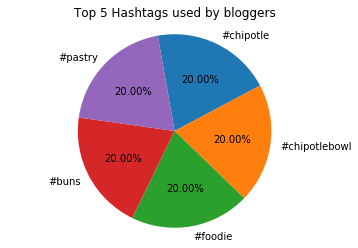

In [17]:
plt.pie(y,labels=x,autopct='%.2f%%',counterclock=False,startangle=100)
plt.axis("equal")
plt.title("Top 5 Hashtags used by bloggers")
plt.show()

## Finding total likes of first 10 posts for each handle

In [18]:
likes={}

for i in top_5_food_users_folowers:
    
    search_box=driver.find_element_by_xpath('//body/div/section/nav/div/div/div/div[2]/input')
    search_box.send_keys(i)
    
    wait=WebDriverWait(driver,20)
    wait.until(EC.presence_of_element_located((By.CLASS_NAME,'yCE8d')))

    user_handle=driver.find_element_by_class_name('yCE8d')
    user_handle.click()
    time.sleep(3)
    
    count=0
    
    first_post=driver.find_element_by_xpath('//div[contains(@class,"_bz0w")]')
    first_post.click()
    time.sleep(3)

    while True:
        time.sleep(3)
        next_post=driver.find_element_by_xpath('//a[contains(@class,"coreSpriteRightPaginationArrow")]')
        
        try:
            temp=driver.find_element_by_xpath('//div[contains(@class,"Nm9Fw")]/button/span').get_attribute('innerHTML')
            temp=temp.replace(",","")
            
            if 'k' in temp:
                temp=temp.replace("k","")
                temp=float(temp)*1000
            elif 'm' in temp:
                temp=temp.replace("m","")
                temp=float(temp)*1000000
                
            temp=int(temp)
            
            likes[i]=likes.get(i,0)+temp
        
        except NoSuchElementException:
            
            driver.find_element_by_class_name('vcOH2').click()
            
            wait=WebDriverWait(driver,20)
            wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"_9Ytll")]/div/div[4]/span')))

            temp=driver.find_element_by_xpath('//div[contains(@class,"_9Ytll")]/div/div[4]/span').get_attribute('innerHTML')
            
            temp=temp.replace(",","")
            
            if 'k' in temp:
                temp=temp.replace("k","")
                temp=float(temp)*1000
            elif 'm' in temp:
                temp=temp.replace("m","")
                temp=float(temp)*1000000
                
            temp=int(temp)
            
            likes[i]=likes.get(i,0)+temp
            
            driver.find_element_by_class_name('QhbhU').click()

        
        count=count+1
        
        if count==10:
            break
            
        next_post.click()

    driver.back()
    time.sleep(3)

    
likes

{'foodinsider': 97973,
 'yourfoodlab': 305278,
 'dilsefoodie': 104061,
 'foodtalkindia': 27292,
 'food': 27292}

## Calculating avg likes

In [19]:
avg_likes={}
for i in likes:
    avg_likes[i]=likes[i]/10
    
avg_likes

{'foodinsider': 9797.3,
 'yourfoodlab': 30527.8,
 'dilsefoodie': 10406.1,
 'foodtalkindia': 2729.2,
 'food': 2729.2}

## Finding followers:likes ratio

In [20]:
followers_likes_ratio={}
x=[]
y=[]

for i in top_5_food_users_folowers:
    followers_likes_ratio[i]=top_5_food_users_folowers[i]/avg_likes[i]
    x.append(i)
    y.append(followers_likes_ratio[i])
    
followers_likes_ratio

{'foodinsider': 214.3447684566156,
 'yourfoodlab': 42.5841364264703,
 'dilsefoodie': 54.77556433245884,
 'foodtalkindia': 109.5559138208999,
 'food': 109.5559138208999}

## Plotting bar graph for followers:likes ratio

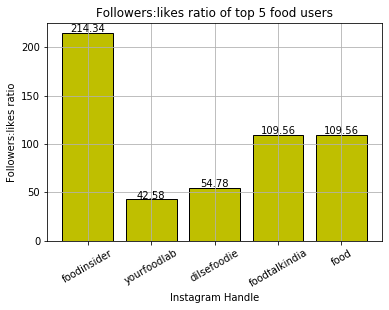

In [21]:
b=plt.bar(x,y,color='y',edgecolor='black')
plt.xlabel("Instagram Handle")
plt.ylabel("Followers:likes ratio")
plt.title("Followers:likes ratio of top 5 food users")
plt.xticks(rotation=30)

for rect in b:
    height=rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2,1.009*height,round(height,2),ha='center')


plt.grid()
plt.show()